<h3>Google Play Store App Purchasing Trends</h3>

<p><b>Authors: </b><br>
Bryan Aguiar,
Alberto Lucas,
Emerald Kunkle</p>

<p><b>Introduction:</b><br>
In our final project, we selected the data set Google Play Store Apps from Lavanya on Kaggle. Our goal is to compare the amount of people buying an app with a high rating, to infer if higher rated apps are correlated with a higher likelihood of purchase. The results would be useful for consumers to know when considering an app purchase, and may save money if a user is vesting more of their willingness to purchase on the ratings from others rather than the personal utility they might find with the prospective app.</p>

<p><b>Description of Data Set:</b><br>
Our selected data set is a compiled list of Google Play Store apps and the apps’ statistics in 2019. The data is purely quantitative, consisting of values such as application name, category, rating, number of reviews, size of the application, number of installs, whether or not the app is free, the price of the app (when it is not free), the content rating, and the genres. It is notable that all these values came from the time of the data collection, and may not accurately reflect current values found on the Google Play Store today.</p>

<p><b>Predictions:</b><br>
Our prediction is that there will indeed be a correlation between highly rated apps and the amount of purchases it garnered. This is due to the fact that many people often seek the advice of others when debating whether to make a purchase, and will often use this advice to estimate the reputation of an app developer they are not familiar with.</p>

<p><b>Features used as predictors:</b><br>
The most important data values we will be using in our evaluations is the Installs (number of user downloads/installs for the app), the Type (paid or free), and Rating (as when scraped). The predictors we anticipate is that an app of type “Paid” will have a higher rate of Installs correlated with a higher number of Rating.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
sns.set()
sns.set_context('notebook')

# change default plot size
rcParams['figure.figsize'] = 9,7

<br>
<h3><u> Data Set - googleplaystore.csv </u></h3>
<p><b>Source:</b> 
<a href="https://www.kaggle.com/lava18/google-play-store-apps">https://www.kaggle.com/lava18/google-play-store-apps </a></p>
<p><b>Description:</b> Contains information related to applications offered on the Android Playstore marketplace.</p>

In [3]:
# data file must be downloaded from source and pathname below should reference that file
df = pd.read_csv('googleplaystore.csv')

In [4]:
# All columns/features in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# First few rows of the data set
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<br>
<h3><u> Data Preparation</u> </h3>
<p> To Do:<br>
<i>Add one hot encoding <br>
Shorten app names <br>
Categorize installs</i></p>

In [6]:
#Count how many na values are in each column/feature
print(df.isna().sum())
print("\nTotal na Values: {}".format(df.isna().sum().sum()))

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Total na Values: 1487


In [7]:
# Drop the rows with missing information
previousRows = df.shape[0]

df = df.dropna()
df = df[df['Size'] != 'Varies with device']
df.reset_index(drop=True, inplace = True)
newRows = df.shape[0]

print("Previous rows:", previousRows)
print("new rows:", newRows)
print("% Change:", (1.0 * (newRows - previousRows) / previousRows) * 100.0)
print("Dropped rows with NA values:", previousRows - newRows)
print("Total current na Values: {}".format(df.isna().sum().sum()))

Previous rows: 10841
new rows: 7723
% Change: -28.76118439258371
Dropped rows with NA values: 3118
Total current na Values: 0


In [8]:
#Convert price column from object to float
df['Price'] = df['Price'].str.replace('$', '').astype(float)

#Convert reviews column from object to int
df['Reviews'] = df['Reviews'].astype(int)

#Convert Size column from object to float
temp = df['Size'][df['Size'].str.strip().str[-1] == 'M'].str.replace('M', '')
temp = temp.astype(float)
df['Size'][df['Size'].str.strip().str[-1] == 'M'] = temp

temp = df['Size'][df['Size'].str.strip().str[-1] == 'k'].str.replace('k', '')
temp = temp.astype(float) / 1000
df['Size'][df['Size'].str.strip().str[-1] == 'k'] = temp

#Condensing Multi Genre Categories into new Primary Genre based on first entry
df['Primary_Genre'] = df['Genres'].str.split(';', 1)
df['Primary_Genre'] = df['Primary_Genre'].str.get(0)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_25388/4252375552.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').astype(float)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_25388/4252375552.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'][df['Size'].str.strip().str[-1] == 'M'] = temp
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_25388/4252375552.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [9]:
#Remove columns not related to research question
df.drop(['Android Ver', 'Current Ver', 'Last Updated'], axis=1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Primary_Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,Art & Design
...,...,...,...,...,...,...,...,...,...,...,...
7718,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.619,"1,000+",Free,0.0,Everyone,Books & Reference,Books & Reference
7719,FR Calculator,FAMILY,4.0,7,2.6,500+,Free,0.0,Everyone,Education,Education
7720,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0.0,Everyone,Education,Education
7721,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,Education,Education


</br>
<h3><u> Data Exploration & Visualization</u> </h3>
<p> To Do:<br>
<i>Fix crowded x-axis on some graphs <br>
Make a grid exploring several features at once <br>
Add other types of plots (scatter, violin, etc) <br>
Create polynomial features<br>
Sort free from paid apps<br>
Condense features if possible</i></p>

4.4    834
4.5    821
4.3    818
4.2    739
4.6    646
4.1    593
4.0    480
4.7    421
3.9    333
3.8    272
5.0    269
4.8    216
3.7    198
3.6    158
3.5    153
3.4    115
3.3     98
4.9     86
3.0     74
3.1     62
3.2     59
2.9     43
2.8     42
2.6     24
2.7     23
2.3     20
2.5     19
2.4     19
1.0     16
2.2     14
1.9     12
2.0     11
1.7      8
1.8      8
2.1      8
1.6      4
1.4      3
1.5      3
1.2      1
Name: Rating, dtype: int64


[Text(0.5, 1.0, 'Count of Ratings')]

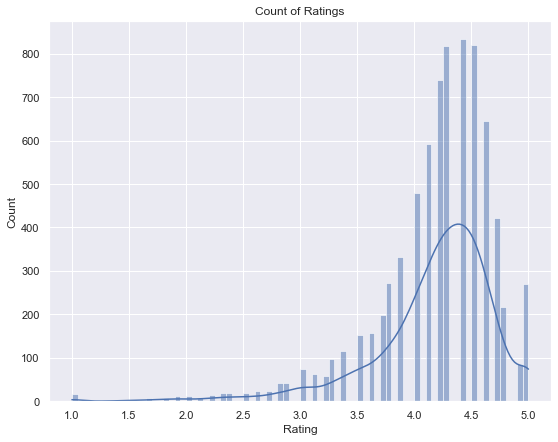

In [10]:
# Show the distribution of all ratings
print(df.Rating.value_counts())
plot = sns.histplot(data=df, x='Rating', kde=True)
plot.set(title='Count of Ratings')

Rating
1.0           28
1.2           44
1.4           98
1.5           61
1.6          691
1.7         2360
1.8         3418
1.9         3531
2.0         2974
2.1         3073
2.2         1979
2.3         2361
2.4        14829
2.5        19399
2.6         3437
2.7        19329
2.8       124890
2.9        57897
3.0        97939
3.1       292316
3.2       224431
3.3      1159575
3.4       702014
3.5      1486271
3.6      1387583
3.7      6225686
3.8      4321872
3.9      9579046
4.0     20137632
4.1     49897283
4.2     90921505
4.3    266766787
4.4    506938846
4.5    752256652
4.6    505959863
4.7     39780356
4.8     17710786
4.9      1390241
5.0         2253
Name: Reviews, dtype: int32


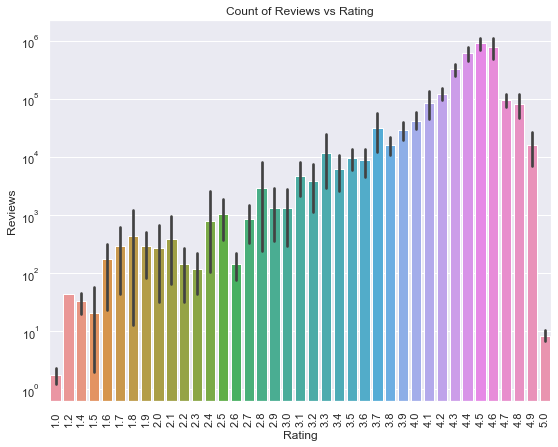

In [11]:
# Show the amount of reviews that apps with a specific rating have
print(df.groupby('Rating')['Reviews'].sum())
plot = sns.barplot(data=df, x='Rating', y='Reviews')
plot.set(title='Count of Reviews vs Rating')
plt.xticks(rotation=90)
plt.yscale('log')

Primary_Genre
Casual           342193523
Strategy         324914873
Arcade           299486408
Action           255517292
Sports           174679505
Communication    117104203
Tools            105276108
Racing            84463211
Photography       76943394
Adventure         65637922
Name: Reviews, dtype: int32


<AxesSubplot:xlabel='Primary_Genre'>

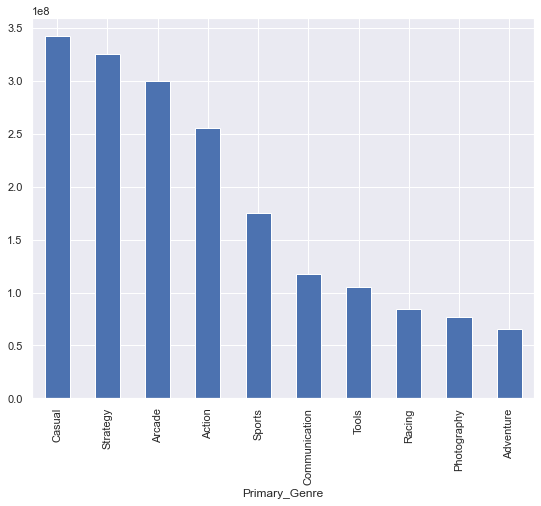

In [12]:
# Examine how many reviews each genre has
print(df.groupby('Primary_Genre')['Reviews'].sum().sort_values(ascending=False)[:10])
df.groupby('Primary_Genre')['Reviews'].sum().sort_values(ascending=False)[:10].plot.bar()

Tools              633
Education          495
Entertainment      478
Action             338
Medical            324
Lifestyle          280
Personalization    278
Finance            266
Sports             263
Business           246
Name: Primary_Genre, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Tools'),
  Text(1, 0, 'Education'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Medical'),
  Text(5, 0, 'Lifestyle'),
  Text(6, 0, 'Personalization'),
  Text(7, 0, 'Finance'),
  Text(8, 0, 'Sports'),
  Text(9, 0, 'Business')])

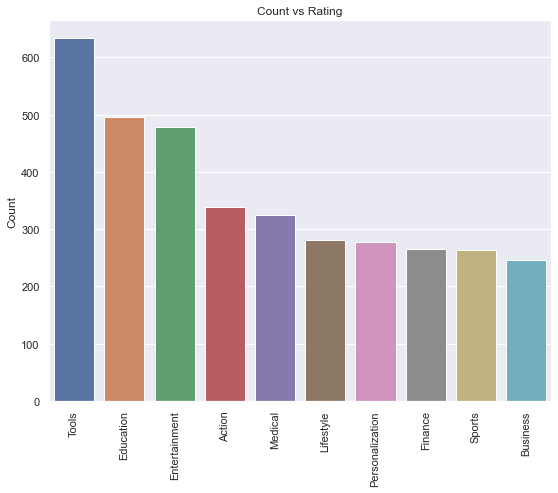

In [13]:
# Examine the amount of ratings each genre has

query = df['Primary_Genre'].value_counts()[:10]
print(query)

plot = sns.barplot(x=query.index, y=query.values)
plot.set(title='Count vs Rating', ylabel='Count')
plt.xticks(rotation=90)

In [14]:
# Shows the count of total apps with the given genre and plot
print(df['Primary_Genre'].value_counts())

Tools                      633
Education                  495
Entertainment              478
Action                     338
Medical                    324
Lifestyle                  280
Personalization            278
Finance                    266
Sports                     263
Business                   246
Photography                236
Productivity               235
Casual                     230
Health & Fitness           225
Communication              211
Arcade                     200
Simulation                 199
Shopping                   179
Social                     177
Dating                     173
News & Magazines           169
Travel & Local             160
Books & Reference          146
Puzzle                     133
Video Players & Editors    118
Role Playing               114
Strategy                   100
Racing                      98
Educational                 97
Maps & Navigation           95
Food & Drink                84
Adventure                   84
Auto & V

Free    7146
Paid     577
Name: Type, dtype: int64


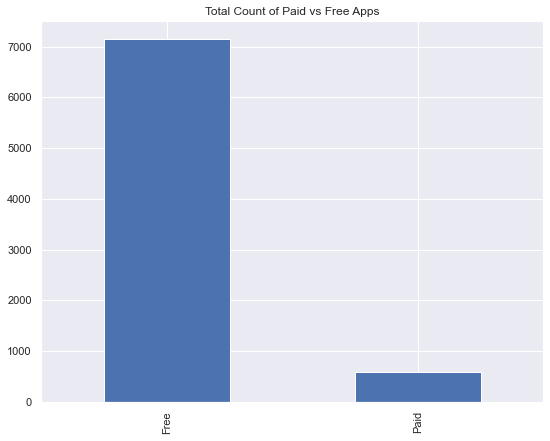

In [15]:
# Shows the count of total paid vs free apps and plot

print(df['Type'].value_counts())

df['Type'].value_counts().plot.bar()
plt.title('Total Count of Paid vs Free Apps');

Type
Paid       4062166
Free    2273437170
Name: Reviews, dtype: object


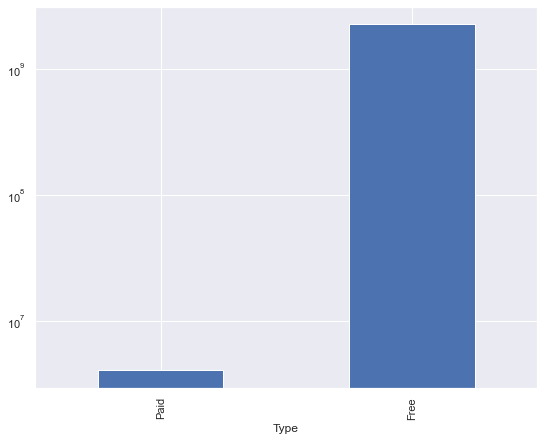

In [16]:
print(df.groupby('Type')['Reviews'].sum().sort_values().apply(lambda x: '%.f' % x))
df.groupby('Type')['Reviews'].sum().sort_values().plot.bar()
plt.yscale('log')

<h3><u> Machine Learning and Predictions </u></h3>
<p> To Do:<br>
<i>Fix crowded x-axis on some graphs <br>
Debug Errors <br>
Examine various modeling algorithms <br>
Examine test and training rmse<br>
Graph test and training rmse<br>
Examine accuracy of each algorithm used</i></p>

In [17]:
# Function to calculate rmse
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

In [18]:
# select the predictor variables and target variables to be used with regression
predictors = ['Rating']
#dropping categortical features, such as ocean_proximity, including spatial ones such as long/lat.
target = 'Installs'
X = df[predictors].values
y = df[target].values
# Split the data into training and test sets, and scale
scaler = StandardScaler()

# unscaled version (note that scaling is only used on predictor variables)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# scaled version
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [19]:
# Needs to be debugged
regr = KNeighborsRegressor()
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
test_rmse = rmse(predictions, y_test)
print('test RMSE, default hyperparameters: {0:.1f}'.format(test_rmse))

TypeError: unsupported operand type(s) for /: 'str' and 'int'